In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import scipy.ndimage as ndimage

## Apply a laplacian sharpening

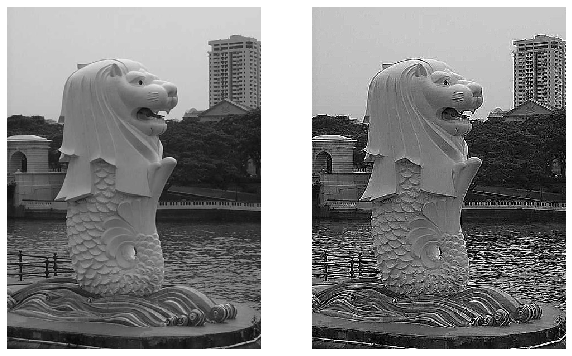

In [2]:
img = cv.imread('highContrast.jpg', 0)
laplace_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
img_laplace = cv.filter2D(img, -1, laplace_kernel)

fig = plt.figure(figsize=(10,10))

fig.add_subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2)
plt.axis('off')
plt.imshow(img_laplace, cmap='gray')

plt.show()

The image has clearly been sharpened, although to the human eye it doesn't seem like an improvement to the image.

## Apply the edge detection

### Manually with a Sobel edge detection mask

Here I have the vertical and horizontal Sobel edge detection mask. These are applied separately and 

In [3]:
vertical_kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
horizontal_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter_vertical = cv.filter2D(img, -1, vertical_kernel)
filter_horizontal = cv.filter2D(img, -1, horizontal_kernel)

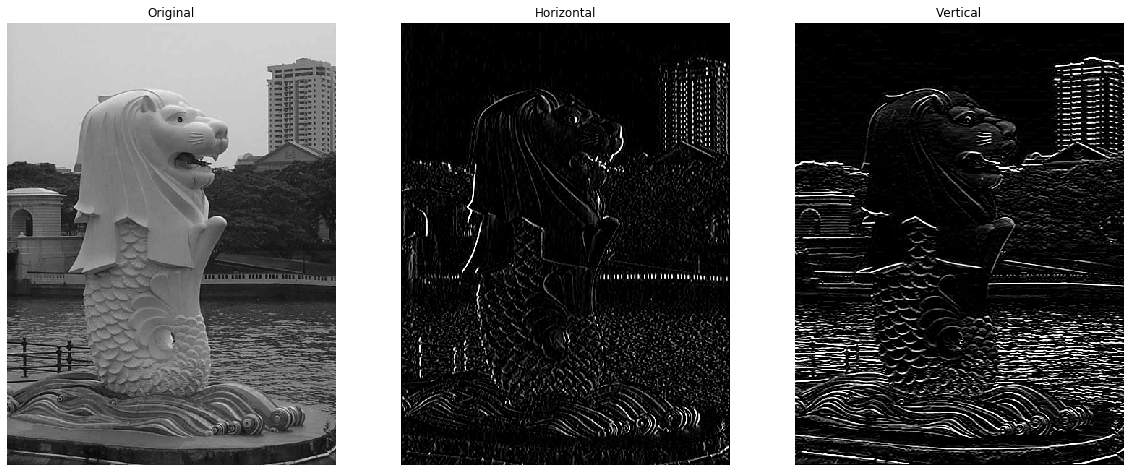

In [4]:
size = 20
fig = plt.figure(figsize=(size,size))

fig.add_subplot(1,3,1)
plt.title('Original')
plt.axis('off')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,3,2)
plt.title('Horizontal')
plt.axis('off')
plt.imshow(filter_horizontal, cmap='gray')

fig.add_subplot(1,3,3)
plt.title('Vertical')
plt.axis('off')
plt.imshow(filter_vertical, cmap='gray')

plt.show()

This way to find edges worked well. In the vertical image the scales on the lion are clear.

### By using the openCV Sobel function

In [5]:
sobel_horizontal = cv.Sobel(img, -1, dx=1, dy=0, ksize=3)
sobel_vertical = cv.Sobel(img, -1, dx=0, dy=1, ksize=3)

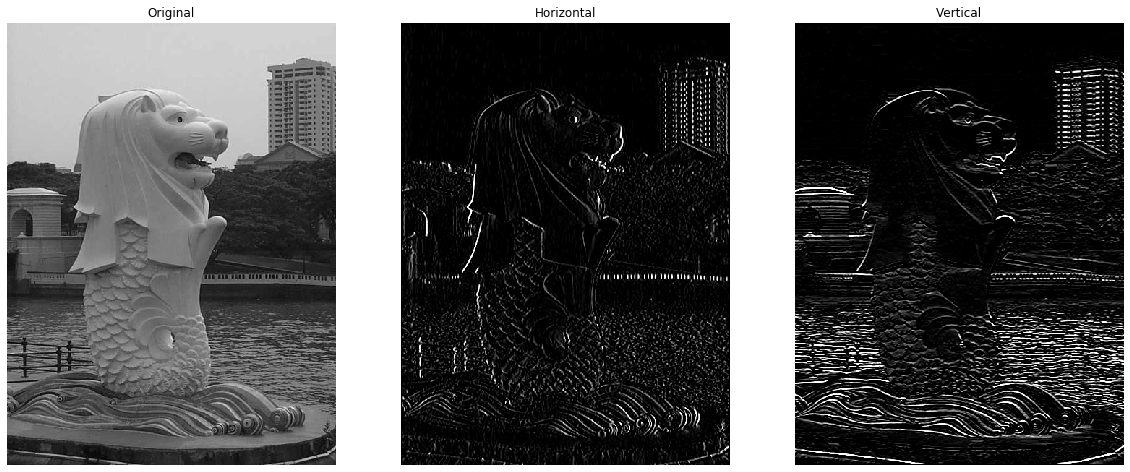

In [6]:
size = 20
fig = plt.figure(figsize=(size,size))

fig.add_subplot(1,3,1)
plt.title('Original')
plt.axis('off')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,3,2)
plt.title('Horizontal')
plt.axis('off')
plt.imshow(sobel_horizontal, cmap='gray')

fig.add_subplot(1,3,3)
plt.title('Vertical')
plt.axis('off')
plt.imshow(sobel_vertical, cmap='gray')

plt.show()

By using opencvs Sobel function, you get a slightly different result. The horizontal image is nearly identical, however the scales on the lion are slightly more faded.

## Edge detection on face.jpg

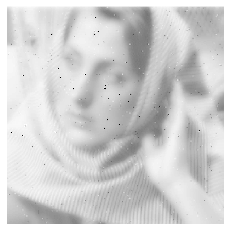

In [7]:
face = cv.imread('face.jpg',0)
plt.imshow(face, cmap='gray')
plt.axis('off')
plt.show()

### Defining functions

In [8]:
# Laplacian
def laplacian_filter(image):
    laplace_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    filtered = cv.filter2D(image, -1, laplace_kernel)
    plt.imshow(filtered, cmap='gray')
    plt.title("Laplacian")
    plt.axis('off')
    plt.show()
    return filtered

# Median
def median_filter(image, x=3):
    filtered = cv.medianBlur(image, x)
    plt.imshow(filtered, cmap='gray')
    plt.title( "Median {x}x{x}".format(x=str(x)))
    plt.axis('off')
    plt.show()
    return filtered

# Gaussian
def gaussian_filter(image, sig=4):
    filtered = ndimage.gaussian_filter(image, sigma=sig)
    plt.imshow(filtered, cmap='gray')
    plt.title( "Gaussian sigma={x}".format(x=str(sig)))
    plt.axis('off')
    plt.show()
    return filtered

# High boost
def hp_filter(image, a=1.1):
    c = 9 * a - 1
    highboost_kernel = np.array([[-1,-1,-1],[-1,c, -1],[-1,-1,-1]])
    filtered = cv.filter2D(image, -1, highboost_kernel)
    plt.imshow(filtered, cmap='gray')
    plt.title( "Highpass x={x}".format(x=str(a)))
    plt.axis('off')
    plt.show()
    return filtered

# Adding together two images
def sum_image(image_1, image_2):
    image = image_1 + image_2
    #image = cv.add(image_1, image_2)
    plt.imshow(image, cmap='gray')
    plt.title( "Sum of two imagse")
    plt.axis('off')
    plt.show()
    return image

# Sobel filtering
def sobel_filter(image, k=3):
    sobel_h = cv.Sobel(image, -1, dx=1, dy=0, ksize=k)
    sobel_v = cv.Sobel(image, -1, dx=0, dy=1, ksize=k)
    final = cv.addWeighted(sobel_h, 0.5, sobel_v, 0.5, -1)
    plt.imshow(final, cmap='gray')
    plt.title("Sobel")
    plt.axis('off')
    plt.show()
    return final

def hist_equalize(image):
    #image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    filtered = cv.equalizeHist(image)
    plt.imshow(filtered, cmap='gray')
    plt.title("Histogram equalized")
    plt.axis('off')
    plt.show()
    filtered = cv.cvtColor(filtered, cv.COLOR_GRAY2BGR)
    return filtered

The order of functions below is what I came up with after testing a bit and from what was mentioned during lessons. 

I start by applying a median value, the first version has a slightly lower version and the second version is a higher value. For both version I then follow the same procedure.

The order is laplacian > histogram equalisation > highpass filter > gauss > sobel > 5x5 median.

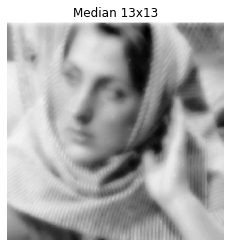

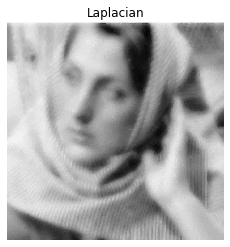

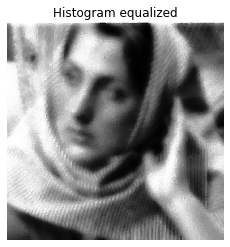

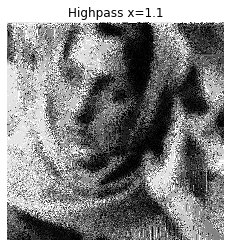

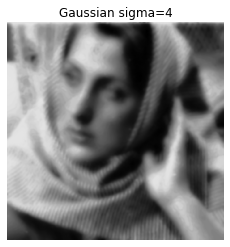

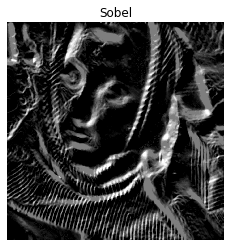

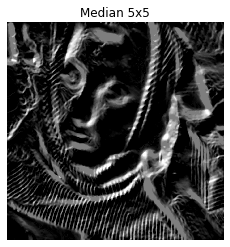

In [9]:
median = median_filter(face, x=13)
laplacian = laplacian_filter(median)
hi = hist_equalize(laplacian)
hp = hp_filter(hi)
gauss2 = gaussian_filter(hp)
sobel = sobel_filter(gauss2, k=5)
smooth = median_filter(sobel, x=5)

The result from the 13x13 median filter at the beginning keeps alot of the scarf details, but for example on the forehead you have some unnecessary/unwanted edges. The backside of the hand also doesn't show an edge.

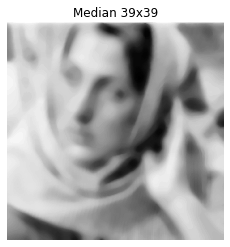

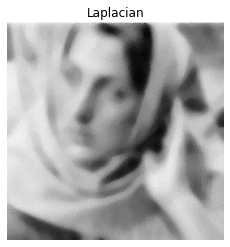

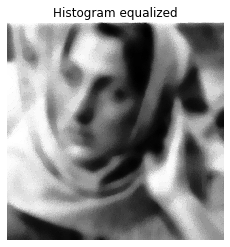

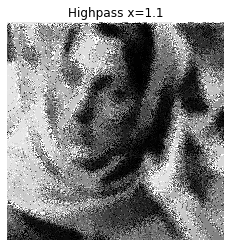

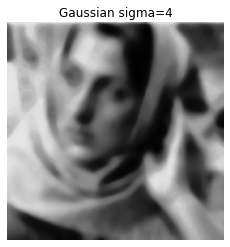

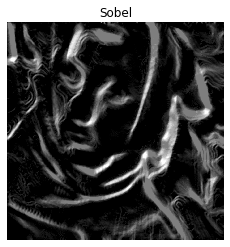

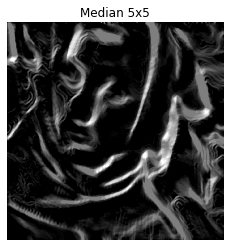

In [10]:
median = median_filter(face, x=39)
laplacian = laplacian_filter(median)
hi = hist_equalize(laplacian)
hp = hp_filter(hi)
gauss2 = gaussian_filter(hp)
sobel = sobel_filter(gauss2, k=5)
smooth = median_filter(sobel, x=5)

This image instead loses most of the details from the scarf, and the forehead also loses some of the unwanted edges. Overall this image is less detailed.

### Results of edge enhancement

In my opinion, the better image from the 2 previous results is the one which better suits your needs. The fisrt one might be better in a situation where you want to recognise whether there is a scarf in the image, while the second one might hold more value to somebody looking for a face to recognize.

## Dooleys stuff

a. original 

b. laplacian 

c. add laplacian and original 

d. sobel

e. smoothing 5x5 

f. product of c and e 

g. sharpened image sum of a + f

h. histo equalization